In [45]:
%matplotlib inline
import datetime
import calendar
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import sklearn.metrics as metrics
# from skopt import BayesSearchCV
from scipy.stats import randint 
from scipy.stats import uniform
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.naive_bayes import GaussianNB
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)

# Analysis

|      feature      | Description | 
|------------|-----|
| date time | year-month-day hour:minuts:seconds |
| Appliances | Energy usage in Wh of the electric appliances inside the house |
| lights |  Energy usage in Wh of the lights appliances inside the house |
| T1 - T9 | Temperature in room 1 - 9 |
| RH_1 - RH_9| Humidity in room 1-9  |
| To | Temperature measured by the nearby weather station |
| Pressure | Air pressure measured by the nearby weather station  |
| RH_out | Humidity outside, measured by the nearby weather station |
| Windspeed | Windspeed m/s, measured by the nearby weather station |
| Visibility | Visibility in km, measured by the nearby weather station  |
| Tdewpoint | Dewpoint measured by the nearby weather station |
| rv1 | random variabele 1 (will be dropped from the start) |
| rv2 | random variabele 2 (will be dropped from the start) |

In [32]:
dataset = pd.read_csv('Energy_consumption.csv')
dataset.drop('rv1', axis=1, inplace=True)
dataset.drop('rv2', axis=1, inplace=True)
dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9


In [33]:
# Uitwerking - Preprocesing
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [34]:
#Date object to datetime
dataset['date']=pd.to_datetime(dataset['date'])
dataset['day'] = dataset['date'].dt.day_name()
dataset['hour']=dataset['date'].dt.hour
dataset['minute']=dataset['date'].dt.minute
dataset.drop('date', axis=1, inplace=True)

<AxesSubplot:xlabel='day', ylabel='Appliances'>

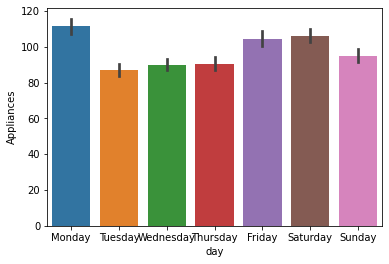

In [35]:
sns.barplot(x='day',y='Appliances',data=dataset)

#On monday, friday and saturday the consumption is a bit higher
#but it's difficult to draw conclusions from this

In [36]:
#One hot encode the days
dataset = pd.concat([dataset,pd.get_dummies(dataset['day'], prefix='day')],axis=1)
dataset.drop(['day'],axis=1, inplace=True)
dataset.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,hour,minute,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,17,0,0,1,0,0,0,0,0
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,17,10,0,1,0,0,0,0,0
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,17,20,0,1,0,0,0,0,0
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,17,30,0,1,0,0,0,0,0
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,17,40,0,1,0,0,0,0,0


<AxesSubplot:xlabel='hour', ylabel='Appliances'>

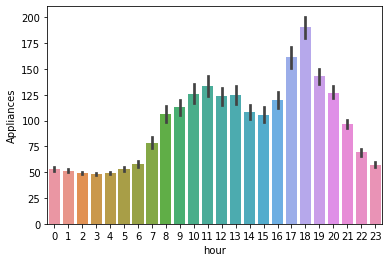

In [37]:
sns.barplot(x='hour',y='Appliances',data=dataset)
#Usage is highest around noon and in the evening
#This makes sense because than people are at home and cooking or doing laundry

In [38]:
#SPLIT DATA
X = dataset.drop(['Appliances'], axis=1)
y= dataset['Appliances'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=5000, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
# Random Forest Regressor
RFR_model = RandomForestRegressor(n_estimators=500,verbose=1)
RFR_model.fit(X_train,y_train)

# Evaluating the model
y_predicted = RFR_model.predict(X_test)
#MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

#MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predicted)
print('r2 score = ',r2)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


MAE =  34.472896
MSE =  5561.607785439999
r2 score =  0.5071899397231617


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished


In [13]:
#See most important features
importance = enumerate(RFR_model.feature_importances_)
importance = sorted(importance, key=lambda x:x[1],reverse=True)[:5]
place=1
top_n_features=[]
for i,v in importance:
    print(f"{place}) {X.columns.values[i]}, Feature: {i}, Score: {v}f")
    place+=1
    
#Like we could already tell from the chart, the hour has a big impact

1) hour, Feature: 25, Score: 0.1523892442756906f
2) T3, Feature: 5, Score: 0.0600906448203972f
3) RH_3, Feature: 6, Score: 0.04794521843801914f
4) RH_5, Feature: 10, Score: 0.045605789980166025f
5) RH_2, Feature: 4, Score: 0.04015594827004797f


### Now we can try using some ensemble methods to find some improvments

In [42]:
#Boosting
regression_gradientboost = GradientBoostingRegressor(n_estimators=500)

regression_gradientboost.fit(X_train,y_train)

y_predicted = regression_gradientboost.predict(X_test)
#MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

#MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predicted)
print('r2 score = ',r2)

#Did not improve our performance

MAE =  42.93207632483054
MSE =  7083.037036154541
r2 score =  0.37237718958381316


In [46]:
#Bagging
regression_bagging= BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=500,verbose=1))

regression_bagging.fit(X_train,y_train)

y_predicted = regression_gradientboost.predict(X_test)
#MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

#MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predicted)
print('r2 score = ',r2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.5min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.4min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

MAE =  42.93207632483054
MSE =  7083.037036154541
r2 score =  0.37237718958381316


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  1.5min finished


In [52]:
#Stacking
estimators = [
    ('lasso', Lasso(fit_intercept=True, alpha= 0.13612186638969007)), #Got by random search
    ('ridge' , Ridge(fit_intercept=True, alpha= 1.571563723255569)), #Got by random search
    ('rfr', RandomForestRegressor(n_estimators=500,verbose=5))
]

stacked_model = StackingRegressor(
estimators=estimators, final_estimator=RandomForestRegressor(n_estimators=200,verbose=5),cv=20,n_jobs=7)    
    
stacked_model.fit(X_train,y_train)

y_predicted = stacked_model.predict(X_test)
#MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

#MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predicted)
print('r2 score = ',r2)

#We can see some improvment compared to boosting and bagging but not compared to the original model

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s


building tree 1 of 200
building tree 2 of 200
building tree 3 of 200
building tree 4 of 200
building tree 5 of 200
building tree 6 of 200
building tree 7 of 200
building tree 8 of 200
building tree 9 of 200
building tree 10 of 200
building tree 11 of 200
building tree 12 of 200
building tree 13 of 200
building tree 14 of 200
building tree 15 of 200
building tree 16 of 200
building tree 17 of 200
building tree 18 of 200
building tree 19 of 200
building tree 20 of 200
building tree 21 of 200
building tree 22 of 200
building tree 23 of 200
building tree 24 of 200
building tree 25 of 200
building tree 26 of 200
building tree 27 of 200
building tree 28 of 200
building tree 29 of 200
building tree 30 of 200
building tree 31 of 200
building tree 32 of 200
building tree 33 of 200
building tree 34 of 200
building tree 35 of 200
building tree 36 of 200
building tree 37 of 200
building tree 38 of 200
building tree 39 of 200
building tree 40 of 200
building tree 41 of 200
building tree 42 of 200
b

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    8.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


MAE =  37.52044
MSE =  6301.520863
r2 score =  0.44162677482207613


[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.3s finished


### Lets try working with a sliding window to improve the model.

In [14]:
# We now take 3 rows every time to feed into the model 
X = dataset.drop(['Appliances'], axis=1)
y= dataset['Appliances'].values
y=pd.DataFrame(y, columns=['Appliances']) 
print(type(X))
print(type(y))
length = 2
key_cols = range(length+1)
X_new = pd.concat([X.shift(-i) for i in key_cols], axis=1, keys=map(str, key_cols)).dropna()
X_new.columns = X_new.columns.map('_'.join)

y_new = pd.concat([y.shift(-i) for i in key_cols], axis=1, keys=map(str, key_cols)).dropna()
y_new.columns = y_new.columns.map('_'.join)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [15]:
X_new

,0_lights,0_T1,0_RH_1,0_T2,0_RH_2,0_T3,0_RH_3,0_T4,0_RH_4,0_T5,0_RH_5,0_T6,0_RH_6,0_T7,0_RH_7,0_T8,0_RH_8,0_T9,0_RH_9,0_T_out,0_Press_mm_hg,0_RH_out,0_Windspeed,0_Visibility,0_Tdewpoint,0_hour,0_minute,0_day_Friday,0_day_Monday,0_day_Saturday,0_day_Sunday,0_day_Thursday,0_day_Tuesday,0_day_Wednesday,1_lights,1_T1,1_RH_1,1_T2,1_RH_2,1_T3,1_RH_3,1_T4,1_RH_4,1_T5,1_RH_5,1_T6,1_RH_6,1_T7,1_RH_7,1_T8,1_RH_8,1_T9,1_RH_9,1_T_out,1_Press_mm_hg,1_RH_out,1_Windspeed,1_Visibility,1_Tdewpoint,1_hour,1_minute,1_day_Friday,1_day_Monday,1_day_Saturday,1_day_Sunday,1_day_Thursday,1_day_Tuesday,1_day_Wednesday,2_lights,2_T1,2_RH_1,2_T2,2_RH_2,2_T3,2_RH_3,2_T4,2_RH_4,2_T5,2_RH_5,2_T6,2_RH_6,2_T7,2_RH_7,2_T8,2_RH_8,2_T9,2_RH_9,2_T_out,2_Press_mm_hg,2_RH_out,2_Windspeed,2_Visibility,2_Tdewpoint,2_hour,2_minute,2_day_Friday,2_day_Monday,2_day_Saturday,2_day_Sunday,2_day_Thursday,2_day_Tuesday,2_day_Wednesday
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.200000,48.900000,17.033333,45.530000,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,17,0,0,1,0,0,0,0,0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,17.0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.73000,17.0,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,17.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.200000,48.863333,17.066667,45.560000,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,17,10,0,1,0,0,0,0,0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,17.0,20.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.59000,17.0,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,17.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.200000,48.730000,17.000000,45.500000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,17,20,0,1,0,0,0,0,0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,17.0,30.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.59000,17.0,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,17.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.100000,48.590000,17.000000,45.400000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,17,30,0,1,0,0,0,0,0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.100000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,17.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,40.0,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,45.730000,17.133333,55.030000,6.300000,85.766667,17.133333,41.260000,18.1000,48.59000,17.0,45.2900,6.016667,73

In [16]:
print(X_new.shape)
print(y_new.shape)
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=5000, random_state=0)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(19733, 102)
(19733, 3)


In [18]:
# Random Forest Regressor
RFR_model = RandomForestRegressor(n_estimators=150)
RFR_model.fit(X_train,y_train)

RFR_model.score(X_test,y_test)

# Evaluating the model
y_predicted = RFR_model.predict(X_test)
#MAE
from sklearn.metrics import mean_absolute_error
MAE = mean_absolute_error(y_test,y_predicted)
print('MAE = ',MAE)

#MSE
from sklearn.metrics import mean_squared_error
MSE = mean_squared_error(y_test,y_predicted)
print('MSE = ',MSE)

#R2
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_predicted)
print('r2 score = ',r2)

#We see some improvment with this technique compared to the original model

MAE =  32.31471111111107
MSE =  4533.83804029629
r2 score =  0.5713355511699978
